<a href="https://colab.research.google.com/github/Hasib1938/Hasib1938/blob/main/teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=d093276b573796485d2009d30321e015efd03a7c7dffdda8fda0476e6d2f3ecf
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.9 MB/s eta 0:00:00


In [ ]:
from qiskit import *
import numpy as np
from qiskit_aer import Aer
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.providers.basic_provider import BasicProvider

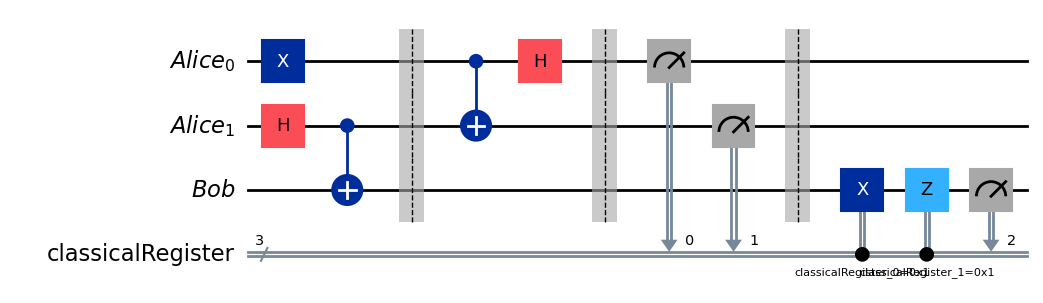

In [ ]:
qr0=QuantumRegister(2,'Alice')
qr1=QuantumRegister(1,'Bob')
cr=ClassicalRegister(3,'classicalRegister')
cir=QuantumCircuit(qr0,qr1,cr)

cir.x(qr0[0])

cir.h(qr0[1])
cir.cx(1,2)
cir.barrier()
cir.cx(0,1)
cir.h(0)
cir.barrier()
cir.measure(qr0[0],cr[0])
cir.measure(qr0[1],cr[1])
cir.barrier()
cir.x(qr1).c_if(cr[0],1)
cir.z(qr1).c_if(cr[1],1)
cir.measure(qr1,cr[2])

simulator=Aer.get_backend('qasm_simulator')
backend=BasicProvider().get_backend('basic_simulator')
transpiled_circuit=transpile(cir,backend)
result= backend.run(transpiled_circuit, shots = 1000).result()
result
cir.draw(output='mpl')


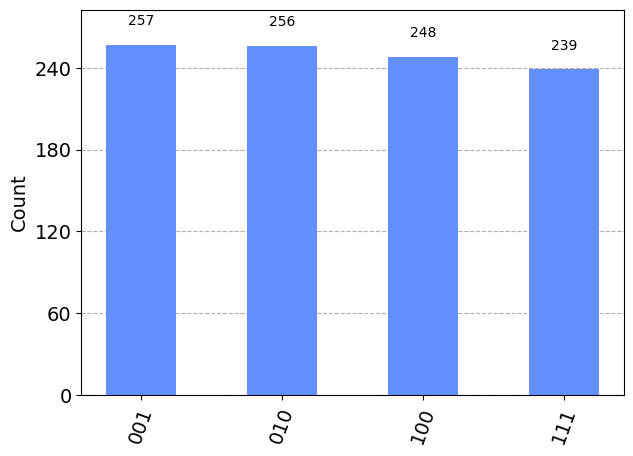

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(cir))